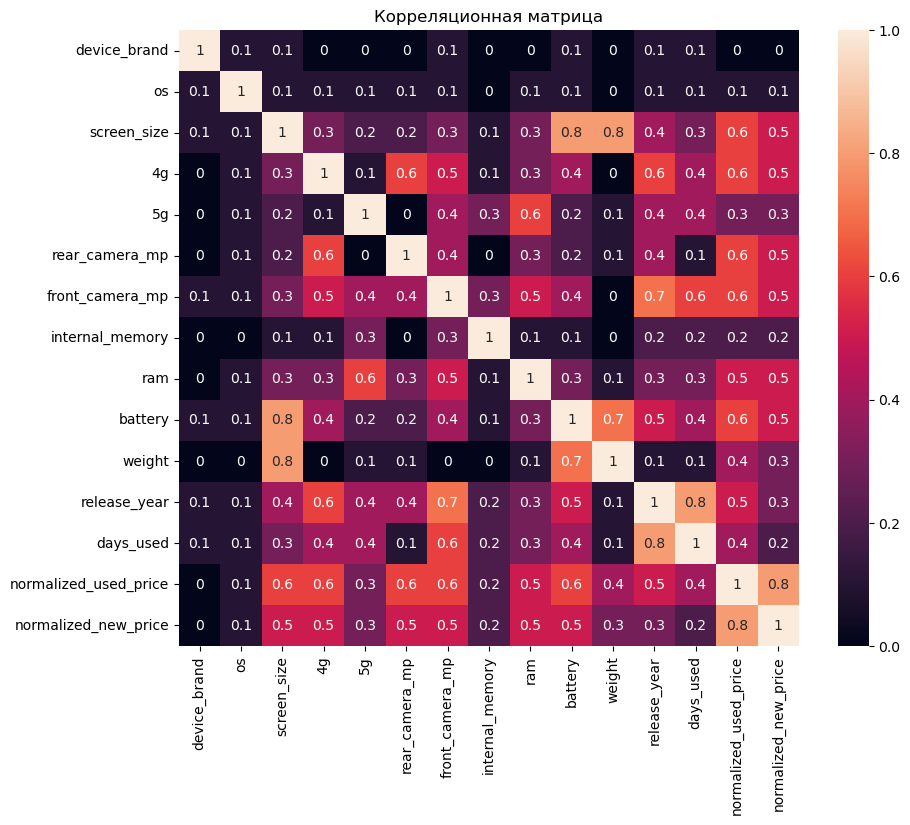

Точность модели: 86.83%


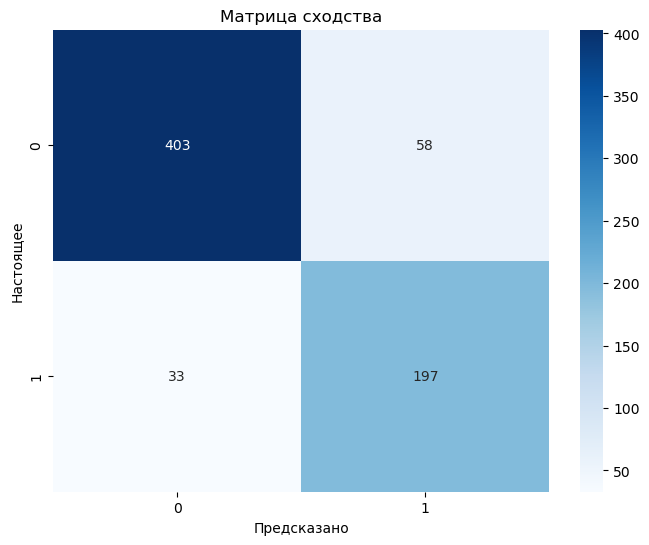

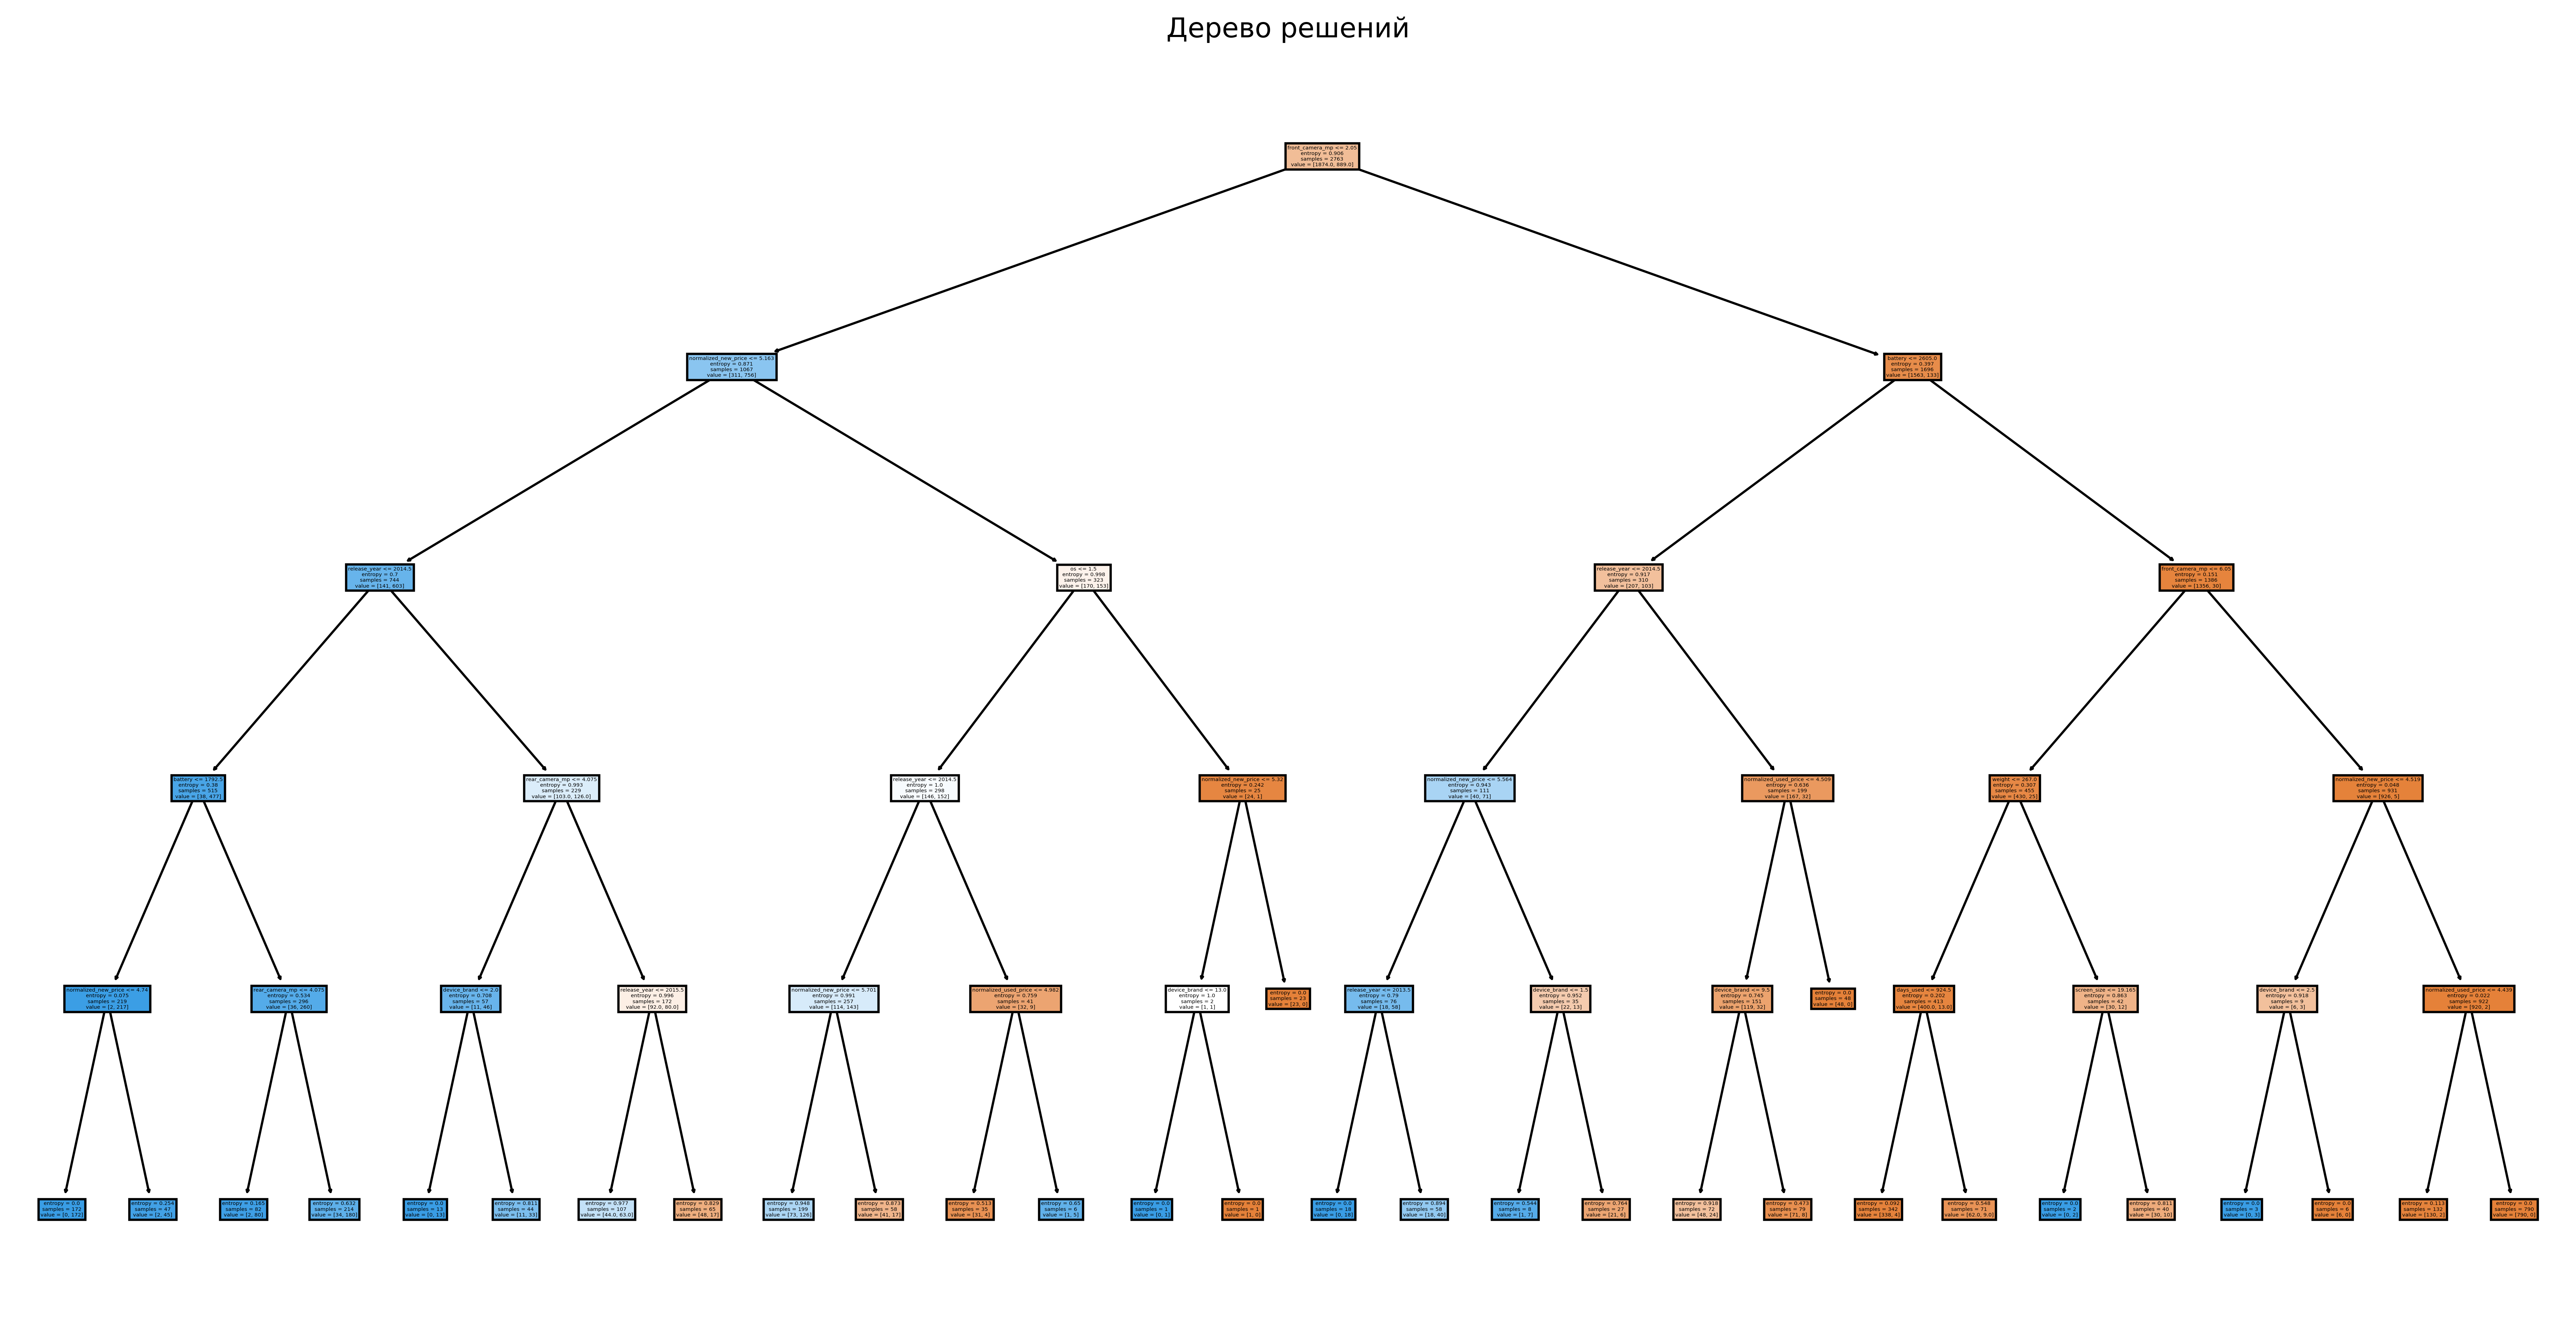

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Загрузка данных
PATH = "used_device_data.csv"  
dataset = pd.read_csv(PATH)

# Факторизация категориальных признаков
COLUMNS_FOR_FACTORISATION = ['device_brand', 'os', '4g', '5g']

for column in COLUMNS_FOR_FACTORISATION:
    if column in dataset.columns:
        dataset[column], _ = pd.factorize(dataset[column])

# Убедимся, что все столбцы являются числовыми, выберем только числовые столбцы для корреляции
dataset_numeric = dataset.select_dtypes(include=['number'])

# Проверка на значимость признаков и их корреляцию
plt.figure(figsize=(10, 8))
sns.heatmap(round(abs(dataset_numeric.corr()), 1), annot=True)
plt.title('Корреляционная матрица')
plt.show()

# Указываем целевую переменную
target_column = '4g'
features = dataset_numeric.drop(target_column, axis=1)

# Делим данные на тренировочные и тестовые выборки
train_input, test_input, train_output, test_output = train_test_split(
    features,
    dataset_numeric[target_column],
    test_size=0.2,
    random_state=42
)

# Построение модели дерева решений

max_depth_value = 5
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_value, random_state=1)
model.fit(train_input, train_output)

# Предсказания и создание матрицы сходства
predictions = model.predict(test_input)
accuracy = accuracy_score(test_output, predictions)

print(f'Точность модели: {accuracy * 100:.2f}%')

confusion_matrix_result = confusion_matrix(test_output, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица сходства')
plt.xlabel('Предсказано')
plt.ylabel('Настоящее')
plt.show()


# Визуализация дерева решений
DPI = 470
plt.figure(figsize=(20, 10), dpi=DPI)
tree.plot_tree(model, filled=True, feature_names=features.columns)
plt.title("Дерево решений")
plt.show()